In [1]:
# To import various libraries

import math
import numpy as np
import cv2
from PIL import Image
import scipy.io
mat = scipy.io.loadmat('stack.mat')

In [2]:
# To store all the frames in a list 'a'

a=[]
for i in range(1,101):
    if i<10:
        a.append(mat[f'frame00{i}'])
    if i >9 and i<100:
        a.append(mat[f'frame0{i}'])
    if i == 100:
        a.append(mat[f'frame{i}'])

In [3]:
# To determine shape of a frame

A,B=a[20].shape
print(A,B)

115 115


In [4]:
# Kernel 1

fxx=np.array([[0,0,0],[1,-2,1],[0,0,0]])
fxx

array([[ 0,  0,  0],
       [ 1, -2,  1],
       [ 0,  0,  0]])

In [5]:
# Convolution between all frames in list 'a' and kernel 1.
# Storing the new frames after convolution in list 'b'

b=[]
for m in range(0,100):
    image_padded = np.zeros((A+2, B+2))
    image_padded[1:-1,1:-1] = a[m]

    f = np.zeros((9))
    g = np.zeros((A+2,B+2))
    H = fxx.reshape((9,1))
    for i in range(1,((A+2)-1)):
        for j in range(1,((B+2)-1)):
            c=0
            for x in range (i-1,i+1+1):
                for y in range (j-1,j+1+1):
                    f[c] = image_padded[x,y]
                    c=c+1
            g[i,j] = np.dot(f,H)
            
    z=[]
    for i in range (0,A+2):
        for j in range (0,B+2):
            if(i>0 and j>0 and i<(A+1) and j<(B+1)):
                z.append(g[i,j])

    z=np.array(z)
    z=z.reshape(A,B)
    b.append(z)

In [6]:
# Kernel 2

fyy=np.array([[0,1,0],[0,-2,0],[0,1,0]])
fyy

array([[ 0,  1,  0],
       [ 0, -2,  0],
       [ 0,  1,  0]])

In [7]:
# Convolution between all frames in list 'a' and kernel 2.
# Storing the new frames after convolution in list 'd'

d=[]
for m in range(0,100):
    image_padded_o = np.zeros((A+2, B+2))
    image_padded_o[1:-1,1:-1] = a[m]

    f_o = np.zeros((9))
    g_o = np.zeros((A+2,B+2))
    H_o = fyy.reshape((9,1))
    for i in range(1,((A+2)-1)):
        for j in range(1,((B+2)-1)):
            c=0
            for x in range (i-1,i+1+1):
                for y in range (j-1,j+1+1):
                    f_o[c] = image_padded_o[x,y]
                    c=c+1
            g_o[i,j] = np.dot(f_o,H_o)
            
    z_o=[]
    for i in range (0,A+2):
        for j in range (0,B+2):
            if(i>0 and j>0 and i<(A+1) and j<(B+1)):
                z_o.append(g_o[i,j])

    z_o=np.array(z_o)
    z_o=z_o.reshape(A,B)
    d.append(z_o)

In [8]:
# To find the Modified Laplacian.
# Storing all the frames in list 'ML'

ML=[]
for m in range(0,100):
    ML.append(abs(b[m])+abs(d[m]))

In [9]:
# Considering q = 2
# To find Sumed modified Laplacian (SML)

q = 2
SML=[]
for p in range (0,100):
    
    image_padded = np.zeros((A+(2*q), B+(2*q)))
    image_padded[q:-q,q:-q] = ML[p]
    
    g = np.zeros((A+(2*q),B+(2*q)))
    for i in range(q,((A+(2*q))-q)):
        for j in range(q,((B+(2*q))-q)):
            c=0
            for x in range (i-q,i+q+1):
                for y in range (j-q,j+q+1):
                    c = c + image_padded[x,y]
            g[i,j] = c
            
    k=[]
    for i in range (0,A+(2*q)):
        for j in range (0,B+(2*q)):
            if(i>(q-1) and j>(q-1) and i<(A+q) and j<(A+q)):
                k.append(g[i,j])

    k=np.array(k)
    k=k.reshape(A,B)
    SML.append(k)

In [10]:
# Gaussian Interpolation to find d_bar
# Storing all d_bars in a list 'D_BAR'

D_BAR=[]
for s in range (0,A):
    for t in range (0,B):
        FM2=0
        fi2=0
        for i in range (0,100):
            if(SML[i][s,t]>FM2):
                FM2=SML[i][s,t]
                fi2=i
        dm2 = fi2*50.50
        dm1=(dm2 - 50.50)
        fi1=(dm2 - 50.50)/50.50
        FM1=SML[int(fi1)][s,t]
        dm3=(dm2 + 50.50)
        fi3=(dm2 + 50.50)/50.50

        if(fi3==100):
            d_bar = dm2
            D_BAR.append(d_bar)
            
        else:
            FM3=SML[int(fi3)][s,t]
            d_bar = (((math.log(FM2)-math.log(FM1))*((dm3*dm3)-(dm2*dm2)))-((math.log(FM2)-math.log(FM3))*((dm1*dm1)-(dm2*dm2))))/(2*50.50*(2*math.log(FM2)-math.log(FM3)-math.log(FM1)))
            D_BAR.append(d_bar)
            
D_BAR=np.array(D_BAR)
D_BAR=D_BAR.reshape(A,B)

In [11]:
# Libraries to plot 3D graph

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

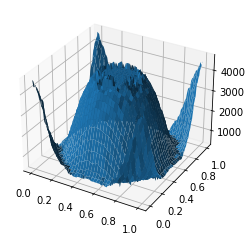

In [12]:
# Plot 3D graph

ny, nx = D_BAR.shape
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dem3d=ax.plot_surface(xv,yv,D_BAR)
plt.show()

In [13]:
# Save the Plot
# fig.savefig('q_2.png')